In [71]:
# Require to install sklearn
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [72]:
# Pick categories 
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
# 
remove = ('headers', 'footers', 'quotes')
# Set training data and test data
newsgroups_train = fetch_20newsgroups(subset = 'train', categories = categories, remove = remove)
newsgroups_test = fetch_20newsgroups(subset = 'test', categories = categories, remove = remove)

In [73]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [74]:
print(len(newsgroups_train.data))
npArr = np.array(newsgroups_train.data)
npArr.shape

2034


(2034,)

### Process Data

In [75]:
# Test
# print("\n".join(newsgroups_train.data[:2]))
# npArr.shape
# npArr[1]

In [85]:
# import the CountVectorizer
# to vectorize documents
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english')
train1 = vectorizer.fit_transform(newsgroups_train.data).todense()
# print(train1.todense())
dictionary = vectorizer.get_feature_names()
# dictionary[10200:10300]
print(train1.shape)

(2034, 26576)


In [86]:
# Need to convert articles into document-term matrix
# *****************************************************
# 

In [87]:
# SVD
U, s, VT = linalg.svd(train1, full_matrices = False)

In [88]:
print(U.shape, s.shape, VT.shape)

(2034, 2034) (2034,) (2034, 26576)


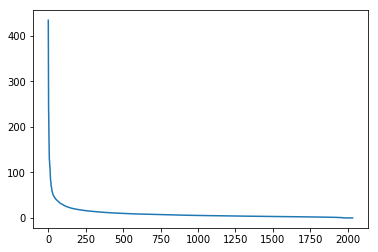

In [90]:
np.diag(s[:10])
plt.plot(s)

In [92]:
num_top_words = 8
def show_topics(a):
    top_words = lambda t: [dictionary[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [93]:
show_topics(VT[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [94]:
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(train1)
H = model.components_

In [95]:
print(W.shape, H.shape)
# print(H.shape)

(2034, 5) (5, 26576)


In [98]:
show_topics(H)

['edu graphics pub image data ftp mail 128',
 'jpeg image gif file color images format quality',
 'god atheists atheism religious believe people religion does',
 'space launch satellite nasa commercial data satellites year',
 'jesus matthew prophecy people said messiah david isaiah']

In [100]:
print(W)

[[ 0.01845416  0.22232837  0.04477547  0.          0.00490275]
 [ 0.00084613  0.          0.01936581  0.0009193   0.00282503]
 [ 0.01338133  0.          0.03341218  0.          0.00200428]
 ..., 
 [ 0.02367721  0.01976214  0.00559548  0.00081868  0.00296729]
 [ 0.          0.0414472   0.35299609  0.          0.0074501 ]
 [ 0.          0.          0.          0.          0.        ]]


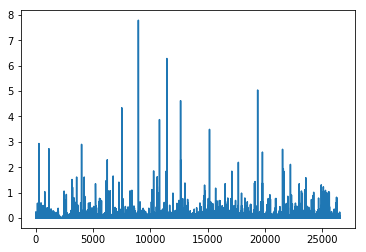

In [99]:
plt.plot(model.components_[0])

In [17]:
# Print some topics 
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [18]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'],
      dtype='<U18')

In [19]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [20]:
# Set the number of topics 
num_tpoics = 6
# Set the number of top words
num_top_words = 8

## Stop Words, Stemming, Lemmatization

In [25]:
from sklearn.feature_extraction import stop_words
# Print some of the stop words:
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

### Stemming and Lemmatization
Are these the same word?  
organize, organizes, organizing  
  
Stemming and Lemmatization both generate the root form of the words

In [37]:
# Import natural langulage too-kit 
# Require to install NLTK
import nltk
# nltk.download('wordnet')

In [38]:
from nltk import stem

In [ ]:
# Cannot use module nlkt in University Jupyter Notebook
# Use sklearn instead:


In [39]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [40]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [41]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [42]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

Try lemmatizing and stemming the following collections of words:  
- fly, flies, flying  
- organize, organizes, organizing  
- universe, university